# Adreanal Medulla Reclustering

In [1]:
library(Seurat)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




## Load the data

In [44]:
seu <- readRDS("data/processed/integrated_annotated.rds")

## Subset AMC (Schwann cell precursors (SCPs), Chromaffin cells, Sympathoblasts)

In [45]:
unique(seu$celltype)

[1] Adrenal gland cortex                  
 [2] Chromaffin cells                      
 [3] Endothelium                           
 [4] 10                                    
 [5] Subepicardial and abdominal mesenchyme
 [6] Intermediate mesoderm                 
 [7] Sympathoblasts                        
 [8] Erythroid cells                       
 [9] HSCs                                  
[10] 9                                     
[11] Immune cells                          
[12] SCPs                                  
12 Levels: SCPs Chromaffin cells Sympathoblasts ... 10

In [46]:
seu_subset <- subset(seu, subset = celltype %in% c("SCPs", "Chromaffin cells", "Sympathoblasts"))

In [47]:
unique(seu_subset$celltype)

[1] Chromaffin cells Sympathoblasts   SCPs            
12 Levels: SCPs Chromaffin cells Sympathoblasts ... 10

## Recluster

In [48]:
seu_subset <- FindVariableFeatures(seu_subset)

Warning message in FindVariableFeatures.Assay(object = object[[assay]], selection.method = selection.method, :
"selection.method set to 'vst' but count slot is empty; will use data slot instead"
Warning message in eval(predvars, data, env):
"NaNs produced"
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
"number of items to replace is not a multiple of replacement length"


In [49]:
seu_subset <- ScaleData(seu_subset)
seu_subset <- RunPCA(seu_subset)
seu_subset <- FindNeighbors(seu_subset, dims = 1:30)

Centering and scaling data matrix

PC_ 1 
Positive:  STMN2, RGS5, CHGB, DBH, PCSK1N, EEF1A2, HAND2-AS1, EML5, CD24, BEX1 
	   GATA3, HAND2, SYT1, MIAT, MAP1B, GATA2, CHGA, CNTN1, BASP1, PHOX2A 
	   TUBB2B, ELAVL4, ISL1, CHRNA3, DPP6, SEZ6L2, RAMP1, RGS4, KIF21A, ELAVL3 
Negative:  PLP1, PTPRZ1, EDNRB, COL5A2, ERBB3, OLFML2A, MPZ, SPARC, S100B, CDH19 
	   VCAN, TGFBR2, POSTN, MOXD1, TRPM3, NR2F2, ABCA8, GPM6B, TTYH1, PLAT 
	   METRN, NID1, HSPG2, COL2A1, SOX10, LMO4, COL1A1, LGI4, GAS7, PLEKHA4 
PC_ 2 
Positive:  TUBB, SOX4, STMN1, TUBA1A, RTN1, GAP43, TUBB2B, TMSB15A, STMN4, ELAVL4 
	   SOX11, TUBA1B, SLC6A2, HMGB1, SYNE2, SMC4, TMSB4X, ASPM, SLC38A1, MLLT11 
	   KIF21A, PLXNA4, RBFOX1, VIM, PHOX2B, TOP2A, PRC1, MKI67, JPT1, TMPO 
Negative:  DLK1, PENK, SLC24A2, ST18, INSM1, CCSER1, PNMT, VWA5B2, NDUFA4L2, CHGA 
	   ADM, ARC, SERTM2, C1QL1, CDKN1C, SCARB1, F10, TH, CCND2, HTATSF1 
	   PCSK2, VEGFA, JUNB, ROBO2, DGKK, SCG2, CARTPT, HIST1H2AC, SMIM1, RALYL 
PC_ 3 
Positive:  CENPF, MKI67

In [50]:
seu_subset <- FindClusters(seu_subset, resolution = 0.1)
seu_subset <- RunUMAP(seu_subset, dims = 1:40)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2118
Number of edges: 94548

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 4
Elapsed time: 0 seconds


20:32:52 UMAP embedding parameters a = 0.9922 b = 1.112

20:32:52 Read 2118 rows and found 40 numeric columns

20:32:52 Using Annoy for neighbor search, n_neighbors = 30

20:32:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:32:53 Writing NN index file to temp file /var/folders/wl/jrkngsm57b944tj7rtjg12000000gn/T//RtmpaP4smC/file2509f0f7c65

20:32:53 Searching Annoy index using 1 thread, search_k = 3000

20:32:53 Annoy recall = 100%

20:32:53 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:32:53 Initializing from normalized Laplacian + noise (using RSpectra)

20:32:53 Commencing optimization for 500 epochs, with 93720 positive edges

20:32:53 Using rng type: pcg

20:32:54 Optimization finished



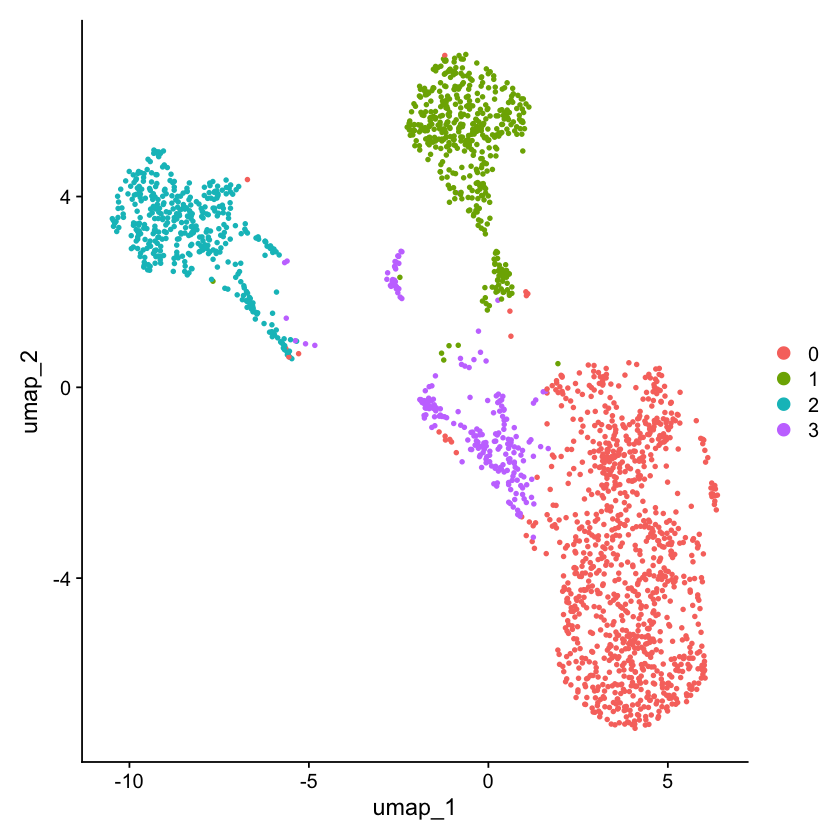

In [51]:
DimPlot(seu_subset)

Fig 2 Markers from the paper

In [52]:
markers <- list(
    "Prolifertating sympathoblasts" = "MKI67",
    "Sympathoblasts" = c("ELAVL4", "ISL1", "PRPH"),
    "SCPs" = c("SOX10","PLP1"),
    "Chromaffin cells" = c("CHGA","PNMT")
)

### Markers for Prol. Sympathoblasts


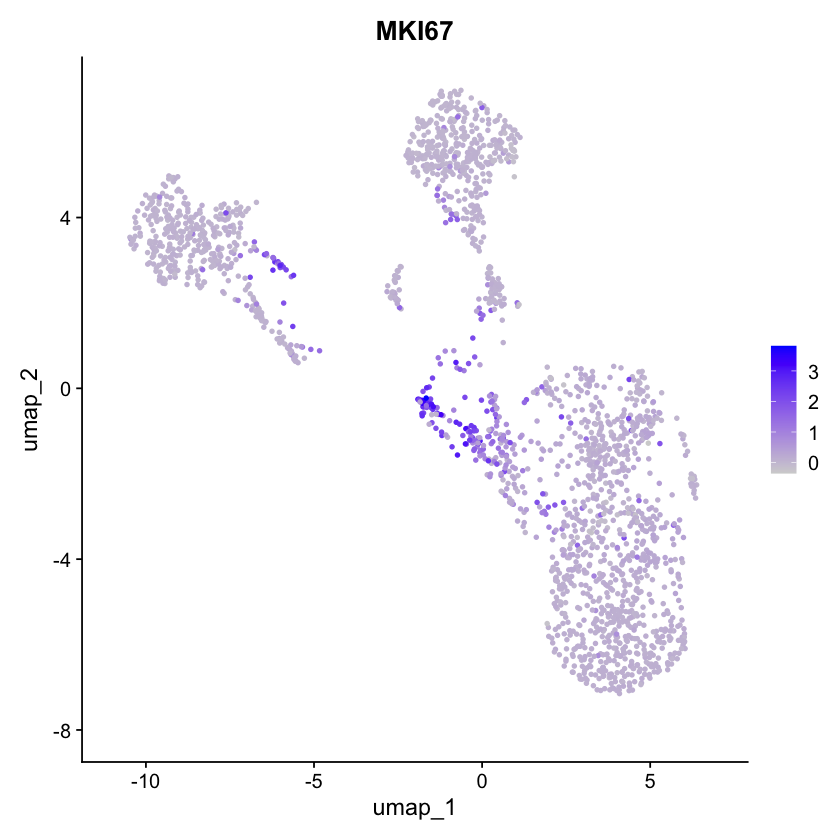

In [53]:
FeaturePlot(seu_subset,markers[[1]])
# cluster 3

### Markers for Sympathoblasts

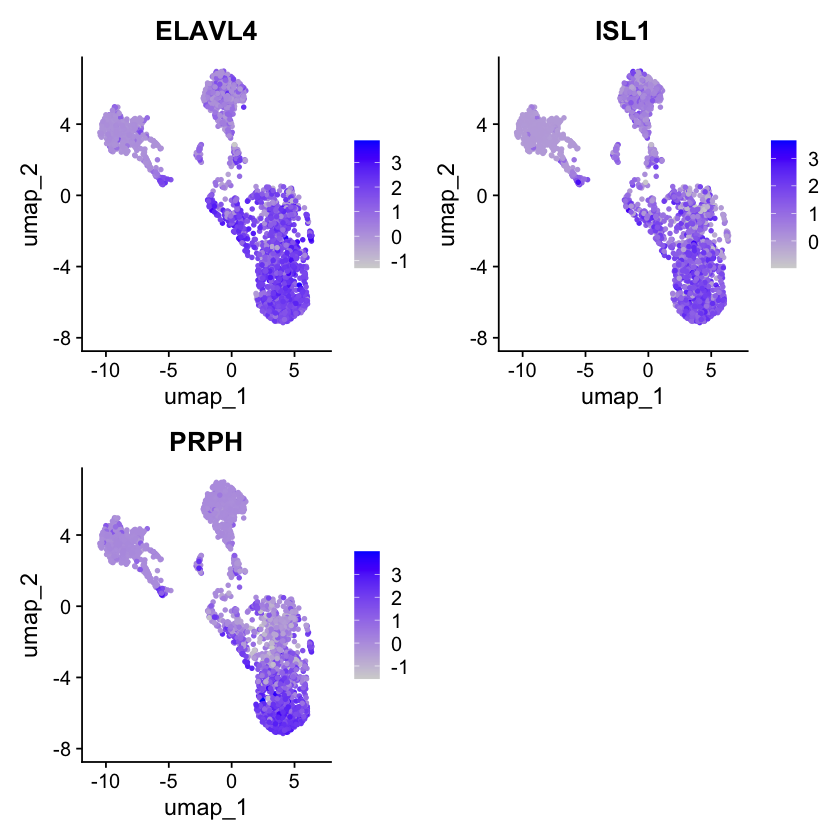

In [54]:
FeaturePlot(seu_subset,markers[[2]])
# cluster 0

### Markers for SCPs

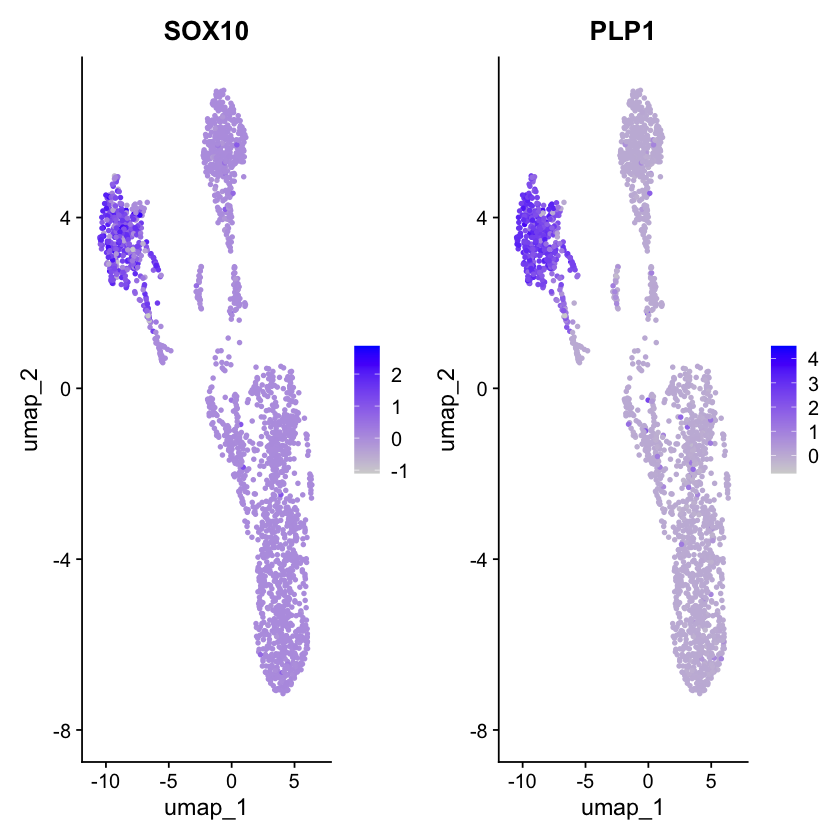

In [55]:
FeaturePlot(seu_subset,markers[[3]], ncol=2)
# cluster 2

### Chromaffin cells

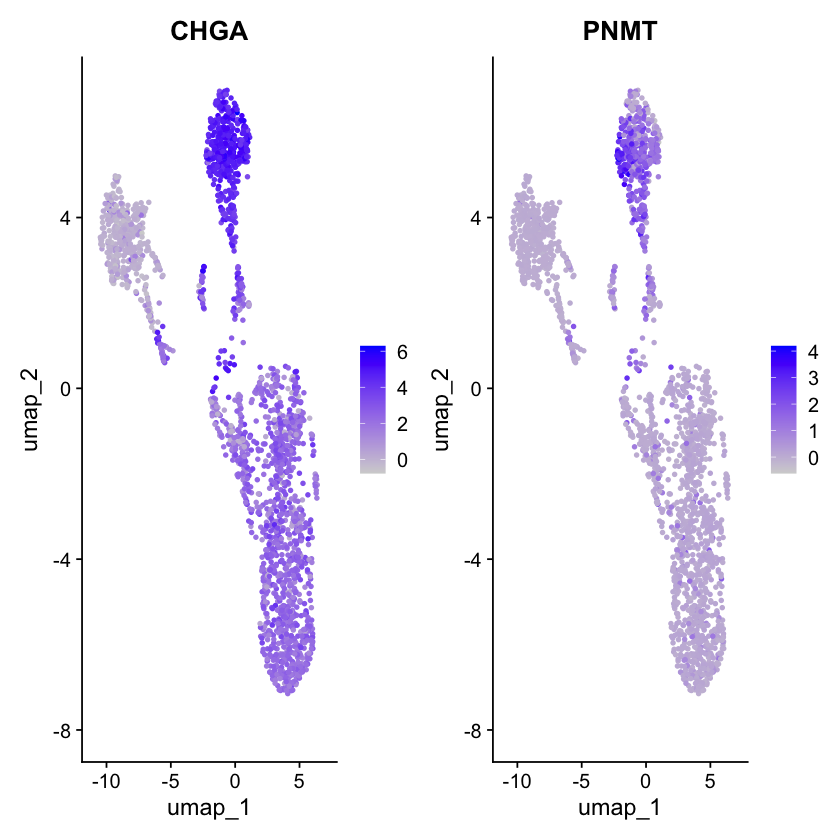

In [56]:
FeaturePlot(seu_subset,markers[[4]], ncol=2)
# cluster 1

In [57]:
cluster <- list(
   "3" = "Prolifertating sympathoblasts",# = "MKI67",
   "0" = "Sympathoblasts",# = c("ELAVL4", "ISL1", "PRPH"),
   "2" = "SCPs",# = c("SOX10","PLP1"),
   "1" = "Chromaffin cells"# = c("CHGA","PNMT")
)


In [58]:
cluster <- unlist(cluster)
seu_subset <- RenameIdents(seu_subset, cluster)
seu_subset$celltype <- Idents(seu_subset)

In [60]:
unique(seu_subset$celltype)


[1] Chromaffin cells              Sympathoblasts               
[3] Prolifertating sympathoblasts SCPs                         
4 Levels: Prolifertating sympathoblasts Sympathoblasts ... Chromaffin cells

## UMAP with Annotations

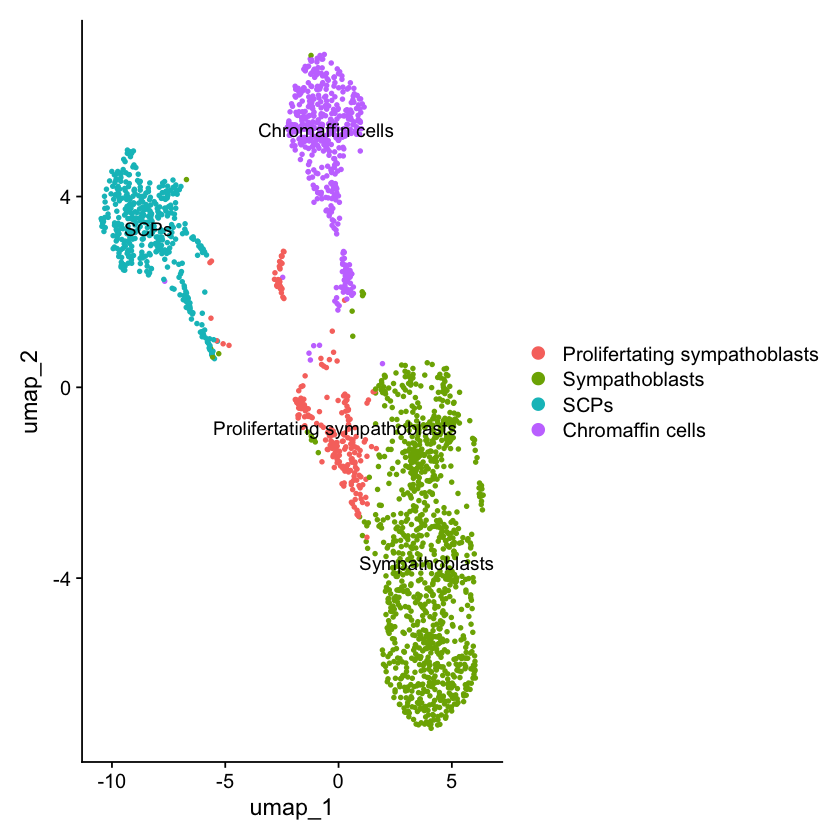

In [63]:
umap_ann_subset =DimPlot(seu_subset, label=TRUE)
umap_ann_subset

In [64]:
ggsave("plots/AMC_subset_UMAP_annotated.pdf",umap_ann_subset, width = 10, height = 8)

In [65]:
saveRDS(seu_subset,"data/processed/AMC_subset_annotated.rds")